# EXTRACTING DATA USING YAHOO FINANCE

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime
import yfinance as yf
# import other necessary libraries

stock = 'TSLA'  # TSLA is the actual stock name in yahoo
start = datetime.datetime(2021,1,1)
end = datetime.datetime(2022,8,1)
tsla_close = yf.download(stock,start = start, end = end, interval = '1d')['Close']

C:\Users\Sahil\anaconda3\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


# PLOTTING TIME SERIES COMPONENTS

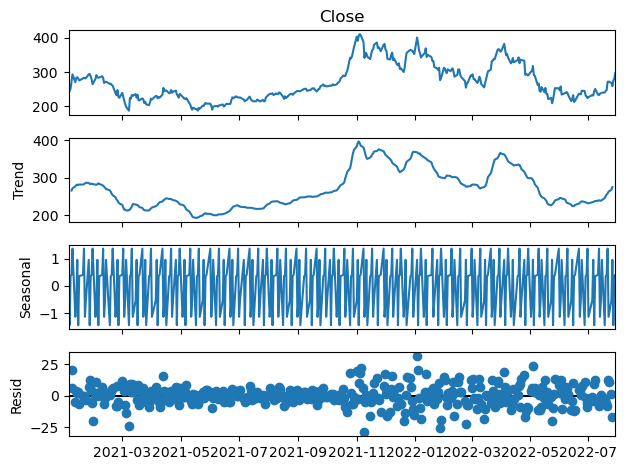

In [5]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(tsla_close,model = 'additive',period = 7)
decomposition.plot()
plt.show()

# FILLING MISSING VALUES AND OUTLIERS

In [6]:
# FORWARD FILL
# fills the vlaue with its preious value

# converting data into dataframe
tsla_close = pd.DataFrame(tsla_close)


In [10]:
tsla_close.head()

,Close
Date,
2021-01-04,243.256668
2021-01-05,245.036667
2021-01-06,251.993332
2021-01-07,272.013336
2021-01-08,293.339996


In [ ]:
aligned_train_y = train['y'].loc[res.fittedvalues.index]
mae_AR_train = mean_absolute_error(aligned_train_y, res.fittedvalues)
print(f"Mean Absolute Error AR (MAE): {mae_AR_train}")


In [ ]:
aligned_test_y = test['y'].loc[res_test.fittedvalues.index]
mae_AR_test = mean_absolute_error(aligned_test_y, res_test.fittedvalues)
print(f"Mean Absolute Error AR (MAE): {mae_AR_test}")

In [ ]:
# Add results for the triple exponential smoothing model
results = Metrics_card(results, mae_AR_train,mae_AR_test, method='AUTOREGRESSION MODEL')

print(results)

In [5]:
# FINALLY FILLING VALUE
tsla_close['tsla_close_ffill'] = tsla_close['Close'].ffill()
tsla_close['tsla_close_ffill'].tail(6)

Date
2022-07-22    272.243347
2022-07-25    272.243347
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: tsla_close_ffill, dtype: float64

In [6]:
tsla_close.head()

,Close,tsla_close_ffill
Date,,
2021-01-04,243.256668,243.256668
2021-01-05,245.036667,245.036667
2021-01-06,251.993332,251.993332
2021-01-07,272.013336,272.013336
2021-01-08,293.339996,293.339996


In [7]:
# BACKWARD FILL
# fils the value with next of its value
tsla_close['tsla_close_bfill'] = tsla_close['Close'].bfill()
tsla_close['tsla_close_bfill'].tail()

Date
2022-07-25    258.859985
2022-07-26    258.859985
2022-07-27    274.820007
2022-07-28    280.899994
2022-07-29    297.149994
Name: tsla_close_bfill, dtype: float64

**INTERPOLATION  - MISSING VALUE IMPUTATION IN TIME SERIES**

In [8]:
from scipy import interpolate
tsla_close['tsla_close_interpolate'] = tsla_close['Close'].interpolate(option = 'time')

In [9]:
tsla_close.tail()

,Close,tsla_close_ffill,tsla_close_bfill,tsla_close_interpolate
Date,,,,
2022-07-25,NaN,272.243347,258.859985,265.551666
2022-07-26,258.859985,258.859985,258.859985,258.859985
2022-07-27,274.820007,274.820007,274.820007,274.820007
2022-07-28,280.899994,280.899994,280.899994,280.899994
2022-07-29,297.149994,297.149994,297.149994,297.149994


# OUTLIERS CORRECTION THROUGH ISOLATION FOREST

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

In [11]:
scaler = StandardScaler()
tsla_scaled = scaler.fit_transform(tsla_close['tsla_close_interpolate'].values.reshape(-1,1))
tsla_scaled = pd.DataFrame(tsla_scaled)

In [12]:
tsla_scaled.head()

,0
0,-0.503933
1,-0.469939
2,-0.337084
3,0.045250
4,0.452537


In [13]:
outlier_fractions = 0.01 # setting a values ourselves for hypertuning
isolation_model = IsolationForest(contamination = outlier_fractions)
isolation_model.fit(tsla_scaled)
tsla_close['anomaly'] = isolation_model.predict(tsla_scaled)

In [ ]:
train = train[-len(predictions):]

In [14]:
tsla_close['anomaly'].value_counts()   # -1 represents the anomaly and 1 represents non- anomaly obs.

anomaly
 1    392
-1      4
Name: count, dtype: int64

# WHITE NOISE

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,6)
import datetime
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

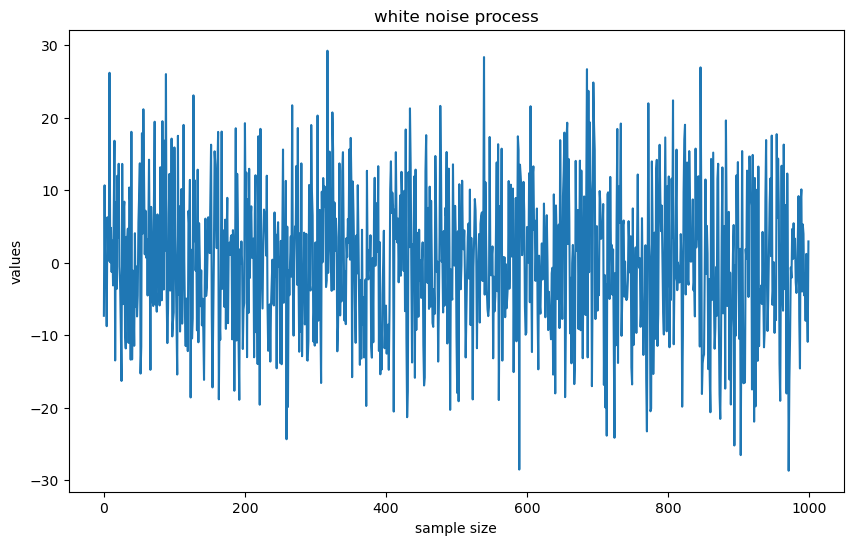

In [16]:
mu = 0
std = 10
sample_size = 1000
wn = np.random.normal(mu,std,sample_size)
plt.plot(wn)
plt.title('white noise process')
plt.xlabel('sample size')
plt.ylabel('values')
plt.show()

# RANDOM WALK

In [17]:
def RandomWalk(steps):
    x,y = 0, 0
    time_steps = np.arange(steps + 1)
    positions = [y]
    random_directions = ['Up','Down']
    for i in range(1, steps + 1):
        step = np.random.choice(random_directions)
        if step == 'Up':
            y +=1
        elif step == 'Down':
            y-=1
        positions.append(y)
    return time_steps,positions


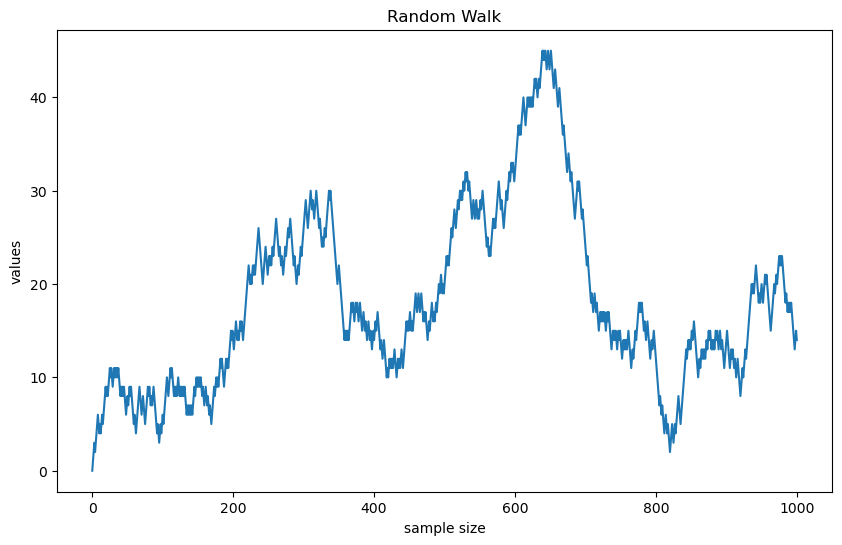

In [18]:
import matplotlib.pyplot as plt
steps = 1000
time_steps,positions = RandomWalk(steps)
plt.plot(time_steps,positions)
plt.title('Random Walk')
plt.xlabel('sample size')
plt.ylabel('values')
plt.show()

**IN RANDOM WALK IT GOES EITHER UPWARD OR DOWNWARD WITH A RANDOM WALK THAT IS WITH A RANDOM CHANGE
IN EACH OBSERVATIONS**

# HANDLING STATIONARY DATA WITH DIFFERENCE FUNCTION

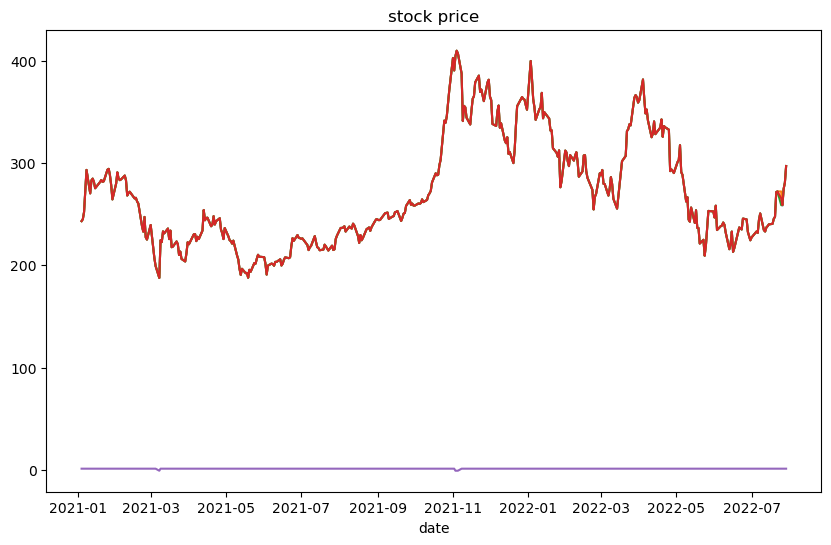

In [19]:
plt.plot(tsla_close)
plt.title('stock price')
plt.xlabel('date')
plt.show()

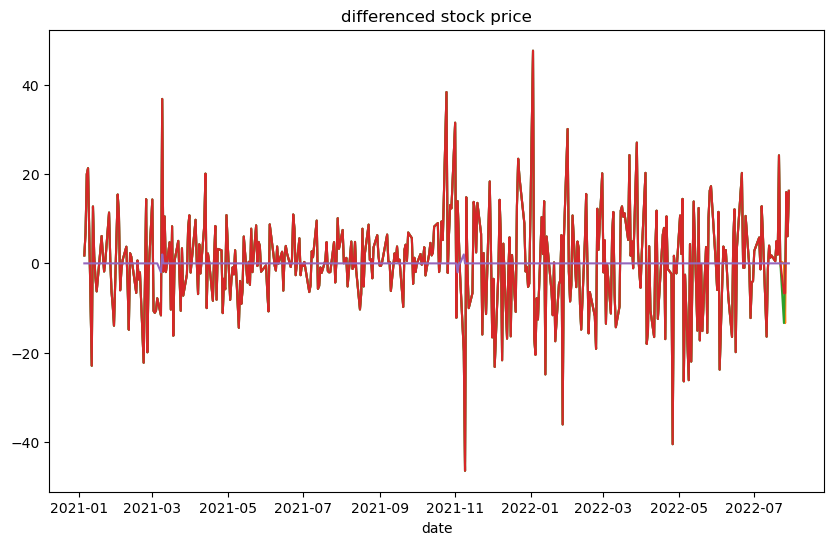

In [20]:
diff_tsla = tsla_close.diff()
plt.plot(diff_tsla)
plt.title('differenced stock price')
plt.xlabel('date')
plt.show()

**NOW WE CAN SEE THAT THE MEAN AND VARIANCE IS CONSTANT BY DRAWING THE LINE BETWEENT THE
FIRST AND LAST POINT , MEANING THAT DATA HAS BECOME STATIONARY**

In [36]:
diff_tsla

,Close,tsla_close_ffill,tsla_close_bfill,tsla_close_interpolate,anomaly
Date,,,,,
2021-01-04,NaN,NaN,NaN,NaN,NaN
2021-01-05,1.779999,1.779999,1.779999,1.779999,0.0
2021-01-06,6.956665,6.956665,6.956665,6.956665,0.0
2021-01-07,20.020004,20.020004,20.020004,20.020004,0.0
2021-01-08,21.326660,21.326660,21.326660,21.326660,0.0
...,...,...,...,...,...
2022-07-25,NaN,0.000000,-13.383362,-6.691681,0.0
2022-07-26,NaN,-13.383362,0.000000,-6.691681,0.0
2022-07-27,15.960022,15.960022,15.960022,15.960022,0.0


# KPSS AND ADF TEST

In [34]:
from statsmodels.tsa.stattools import adfuller
stat_test = adfuller(tsla_close['tsla_close_interpolate'].values)
print('The Test statistic is {} and p-value is {}'.format(stat_test[0],stat_test[1]))

The Test statistic is -2.057753217003015 and p-value is 0.2618378584915012


In [ ]:
# THE DATA IS NON STATIONARY AS THE P-VALUE IS MORE THAN 0.05

In [37]:
# applying differencing 
stat_test = adfuller(diff_tsla['tsla_close_interpolate'].values)
print('The Test statistic is {} and p-value is {}'.format(stat_test[0],stat_test[1]))

MissingDataError: exog contains inf or nans

In [47]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

p_value =  sm.tsa.stattools.kpss(tsla_close['tsla_close_interpolate'].values, regression = 'ct')
print('p-value is {}'.format(p_value))

p-value is (0.362696017531658, 0.01, 11, {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216})
